In [25]:
import os
import numpy as np
import random

def read_text_files(folder_path):
    """Reads all text files in the given folder."""
    contents = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        # Check if it's a file and has .txt extension
        if os.path.isfile(file_path) and filename.endswith(".txt"):
            with open(file_path, "r") as file:
                content = file.read()
                contents.append(content)
    return contents

In [26]:
# Training set
train_positive_reviews = read_text_files("data/aclImdb/train/pos/")
train_negative_reviews = read_text_files("data/aclImdb/train/neg/")
train_reviews = train_positive_reviews + train_negative_reviews
y_train = np.array([1]*12500 + [0]*12500)
#Test set
test_positive_reviews = read_text_files("data/aclImdb/test/pos/")
test_negative_reviews = read_text_files("data/aclImdb/test/neg/")
test_reviews = test_positive_reviews + test_negative_reviews
y_test = np.array([1]*12500 + [0]*12500)

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [28]:
vocab = 10000
tokens = Tokenizer(num_words=vocab)
tokens.fit_on_texts(train_reviews)

In [29]:
word_index = tokens.word_index
sequence_train = tokens.texts_to_sequences(train_reviews)

In [ ]:
word_num = 500
x_train = pad_sequences(sequence_train,maxlen = word_num)

FOR TEST

In [58]:
word_index = tokens.word_index
sequence_test = tokens.texts_to_sequences(test_reviews)
x_test = pad_sequences(sequence_test,maxlen=word_num)

SPLIT TRAIN & VALIDATION

In [31]:
n = x_train.shape[0]
np.random.seed(42)
ren_perm = np.random.permutation(n)
n_valid = int(n*0.2)
x_valid = x_train[ren_perm[0:n_valid]]
y_valid = y_train[ren_perm[0:n_valid]]
x_train = x_train[ren_perm[n_valid:n]]
y_train = y_train[ren_perm[n_valid:n]]

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Embedding , SimpleRNN


HYPER PARAM

In [50]:
vocab = 10000 #unique words in dictionary
embedding_dim = 32
word_num = 500 #sequence length
state_dim = 32

In [ ]:

model = Sequential()
model.add(Input((word_num,)))
model.add(Embedding(vocab , embedding_dim))
model.add(SimpleRNN(state_dim, return_sequences=False )) #return_seq as true will give us all the outputs of hidden state h0 to ht which means it can be used for hypertuning the model for better accuracy but in this case the accuracy remains the same
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_10 (SimpleRNN)       │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,113 (1.23 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
hostory = model.fit(x_train, y_train , epochs= 5, batch_size=32 , validation_data=(x_valid,y_valid))

Epoch 1/5


625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 56ms/step - acc: 0.5155 - loss: 0.6936 - val_acc: 0.5500 - val_loss: 0.6865
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - acc: 0.5921 - loss: 0.6772 - val_acc: 0.5474 - val_loss: 0.6747
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - acc: 0.7063 - loss: 0.5741 - val_acc: 0.7968 - val_loss: 0.4752
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - acc: 0.8090 - loss: 0.4478 - val_acc: 0.8120 - val_loss: 0.4294
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - acc: 0.8514 - loss: 0.3723 - val_acc: 0.8258 - val_loss: 0.3994


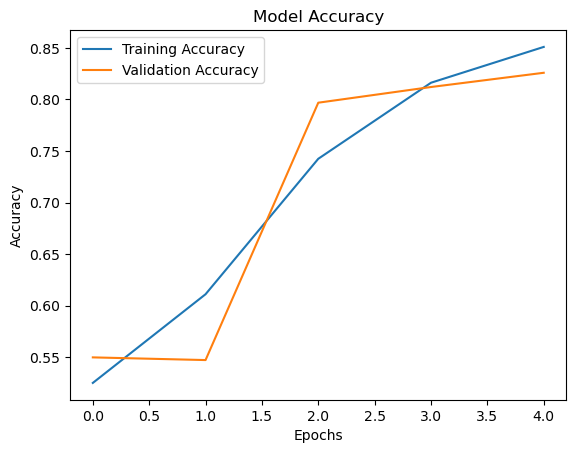

In [54]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(hostory.history['acc'], label='Training Accuracy')
plt.plot(hostory.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

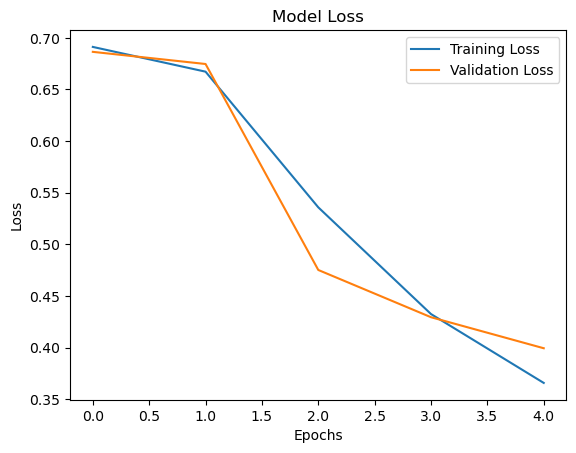

In [55]:
# Plot training and validation loss
plt.plot(hostory.history['loss'], label='Training Loss')
plt.plot(hostory.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
loss_and_acc = model.evaluate(x_test, y_test)
print('loss = ' + str(loss_and_acc[0]))
print('acc = ' + str(loss_and_acc[1]))

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.8036 - loss: 0.4474
loss = 0.3995729386806488
acc = 0.8261600136756897


# Building an LSTM model

In [61]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Embedding, Dense 

In [65]:
vocab = 10000
embed_dim = 32
word_num = 500
state_dim = 32


model = Sequential()
model.add(Input((word_num,)))
model.add(Embedding(vocab,embed_dim))
model.add(LSTM(state_dim,return_sequences=False))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,353 (1.25 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
from keras import optimizers
model.compile(optimizer= optimizers.RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy', metrics = ['acc'])

In [67]:
history = model.fit(x_train,y_train, epochs = 10 , batch_size=32 , validation_data=(x_valid,y_valid))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 89ms/step - acc: 0.5379 - loss: 0.6924 - val_acc: 0.6088 - val_loss: 0.6890
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - acc: 0.6428 - loss: 0.6709 - val_acc: 0.7532 - val_loss: 0.5320
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - acc: 0.7948 - loss: 0.4828 - val_acc: 0.8450 - val_loss: 0.3807
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - acc: 0.8652 - loss: 0.3496 - val_acc: 0.8746 - val_loss: 0.3186
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - acc: 0.8927 - loss: 0.2810 - val_acc: 0.8828 - val_loss: 0.2929
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 100ms/step - acc: 0.9079 - loss: 0.2442 - val_acc: 0.8892 - val_loss: 0.2796
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 103ms/step - acc: 0.9179 - loss: 0.2189 - val_acc: 0.8854 - val_loss: 0.2960
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - acc: 0.9224 - loss: 0.2093 - val_acc: 0.8910 - val_loss: 0.2766
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━

In [68]:
loss_and_acc = model.evaluate(x_test,y_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - acc: 0.8889 - loss: 0.2787


In [ ]:
print('loss = ' + str(loss_and_acc[0]))
print('acc = ' + str(loss_and_acc[1]))